In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root = 'grive/my drive/program/python/ml dl/datasets/'

Mounted at /content/gdrive


In [80]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

import torch
import pandas as pd

In [86]:
root = '/content/gdrive/MyDrive/Program/Python/ML DL/Datasets/healthygamer_gg_testdata.csv'

data = pd.read_csv(root, encoding='UTF-8')
data

,user,channel,message,timestamp
0,itztony1702,healthygamer_gg,BibleThump BibleThump,2021-07-16 14:05:22
1,flaredrip,healthygamer_gg,SUPERHERO BibleThump BibleThump,2021-07-16 14:05:23
2,modxta23,healthygamer_gg,GOOD DAD FeelsGoodMan,2021-07-16 14:05:23
3,reaperdiff,healthygamer_gg,FeelsStrongMan,2021-07-16 14:05:23
4,3rdkira,healthygamer_gg,drhgWeird,2021-07-16 14:05:25
...,...,...,...,...
7725,tmi,NaN,tmi.twitch.tv,2021-07-16 15:40:08
7726,0v3rki1192,healthygamer_gg,like does he actually now what content she mak...,2021-07-16 15:41:12
7727,wizz4e,healthygamer_gg,he 100% didn't knew/didn't check,2021-07-16 15:42:48
7728,tmi,NaN,tmi.twitch.tv,2021-07-16 15:44:16


### Import all of the necessary modules
`Counter` is a method inside of `collections` module that was designed to specially count hashable object, like a `dict`.

For data visualization, we use `matplotlib` and `plotly`. `matplotlib` for pie chart, `plotly` for bar chart.

In [105]:
from collections import Counter
from plotly.offline import init_notebook_mode, iplot, plot

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [110]:
# Find items and count its appearance
counter_user = Counter(data.user)
counter_msg = Counter(data.message)

# Look for the top 15 most common items
most_common_user = counter_user.most_common(15)
most_common_msg = counter_msg.most_common(15)

# Convert it to DataFrame object and rename its header
# You need to be careful of the naming here, try to find pretty unique name for column,
# or add some word like that counts instead of count
most_common_user = pd.DataFrame(most_common_user)
most_common_user.columns = ['user', 'counts']

most_common_msg = pd.DataFrame(most_common_msg)
most_common_msg.columns = ['message', 'counts']

print(most_common_user, '\n')
print(most_common_msg)

                         user  counts
0                  kwesiquest     126
1   pogchamp_is_whack30303030     102
2                    modxta23     100
3               jackjoejacket      86
4               kingkrishlive      79
5                     mahiel3      76
6                   jaytea111      74
7                 error_40420      66
8                klitkommanda      65
9                   lmdoubleg      65
10                  fahd_khan      56
11                     n3ptun      56
12                      loern      51
13                  replaykay      49
14            buttfarm_poker_      49 

           message  counts
0            Sadge     266
1             KEKW     247
2               <3     241
3           monkaW     136
4   FeelsStrongMan     135
5              Pog     108
6               EZ     107
7              LUL     105
8             LULW     100
9         OMEGALUL      89
10             NaN      83
11               )      75
12        Jebaited      66
13       Pep

### Display a graph for most common user
We display this graph using `plotpy`.

In [109]:
graph_user = go.Bar(
    x = most_common_user.user,
    y = most_common_user.counts,
    name = 'most_common_user',
    marker = dict(color='rgba(0, 0, 0, 0.5)',
                  line=dict(color='rgb(0, 0, 0)',
                            width=1.5)
                  ),
    text = most_common_user.user,
)

data_user = [graph_user]
layout_user = go.Layout(barmode='group')
figure_user = go.Figure(data=data_user, layout=layout_user)
iplot(figure_user)

### Display a graph for most common message
We display this graph using `plotpy`

In [113]:
graph_msg = go.Bar(
    x = most_common_msg.message,
    y = most_common_msg.counts,
    name = 'most_common_message',
    marker = dict(color='rgba(0, 0, 255, 0.5)',
                  line=dict(color='rgb(0, 0, 255)',
                            width=1.5)
                  ),
    text = most_common_msg.message,
)

data_msg = [graph_msg]
layout_msg = go.Layout(barmode='group')
figure_msg = go.Figure(data=data_msg, layout=layout_msg)
figure_msg

In [115]:
counter_time = Counter(data.timestamp)
most_common_time = counter_time.most_common(5)
most_common_time = pd.DataFrame(most_common_time)
most_common_time.columns = ['time', 'counts']
most_common_time

,time,counts
0,2021-07-16 15:25:24,22
1,2021-07-16 15:25:35,19
2,2021-07-16 14:27:49,18
3,2021-07-16 15:25:33,17
4,2021-07-16 15:25:21,16


### Display graph for most common time
We display the graph here using `matplotlib`

Text(0.5, 1.0, 'Most active time')

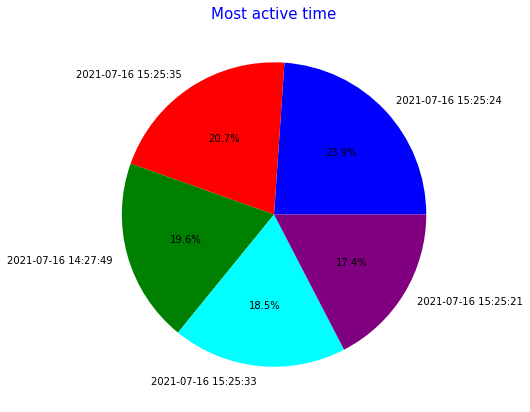

In [117]:
labels = most_common_time.time
colors = ['blue', 'red', 'green', 'cyan', 'purple']
explode = [0, 0, 0, 0, 0]
sizes = most_common_time.counts

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Most active time', color='blue', fontsize=15)

In [123]:
data_dict = {}
for user, msg in zip(data.user, data.message):
    data_dict[user] = msg

1395